In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [2]:
# Load your dataset
# Assuming your dataset has columns 'datetime', 'total_visitor', 'total_accomodation'
# Adjust the file path accordingly

data = pd.read_csv('KepRiau 2015 - 2022.csv')

# Convert 'datetime' column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Set 'datetime' column as index
data.set_index('datetime', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define your input and output variables
X = data_scaled[:, 1]  # 'total_accomodation' as input
y = data_scaled[:, 0]  # 'total_visitor' as output

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [3]:
# Reshape data for GRU input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))


In [4]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)




Epoch 1/50

3/3 - 3s - loss: 0.3416 - val_loss: 0.0510 - 3s/epoch - 1s/step
Epoch 2/50
3/3 - 0s - loss: 0.3061 - val_loss: 0.0388 - 74ms/epoch - 25ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2729 - val_loss: 0.0308 - 59ms/epoch - 20ms/step
Epoch 4/50
3/3 - 0s - loss: 0.2427 - val_loss: 0.0268 - 66ms/epoch - 22ms/step
Epoch 5/50
3/3 - 0s - loss: 0.2145 - val_loss: 0.0269 - 66ms/epoch - 22ms/step
Epoch 6/50
3/3 - 0s - loss: 0.1891 - val_loss: 0.0309 - 58ms/epoch - 19ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1655 - val_loss: 0.0387 - 56ms/epoch - 19ms/step
Epoch 8/50
3/3 - 0s - loss: 0.1450 - val_loss: 0.0500 - 47ms/epoch - 16ms/step
Epoch 9/50
3/3 - 0s - loss: 0.1277 - val_loss: 0.0647 - 41ms/epoch - 14ms/step
Epoch 10/50
3/3 - 0s - loss: 0.1126 - val_loss: 0.0823 - 45ms/epoch - 15ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0984 - val_loss: 0.1020 - 52ms/epoch - 17ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0871 - val_loss: 0.1234 - 60ms/epoch - 20ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0801 - val_loss: 0.

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


1/1 [==============================] - 1s 640ms/step
Mean Squared Error (MSE): 7288762.789063975
Mean Absolute Error (MAE): 2550.0770319893613
Mean Absolute Percentage Error (MAPE): 24.66%


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                7950      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 8001 (31.25 KB)
Trainable params: 8001 (31.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods + 1).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates = pd.date_range(start=data.index[-1], periods=future_periods + 2, freq='M')[1:]


1/1 [==============================] - 0s 30ms/step


TEST SIZE 70:30

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [9]:
# Reshape data for GRU input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))


In [10]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
3/3 - 4s - loss: 0.3620 - val_loss: 0.0234 - 4s/epoch - 1s/step
Epoch 2/50
3/3 - 0s - loss: 0.3290 - val_loss: 0.0201 - 57ms/epoch - 19ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2974 - val_loss: 0.0197 - 53ms/epoch - 18ms/step
Epoch 4/50
3/3 - 0s - loss: 0.2686 - val_loss: 0.0222 - 58ms/epoch - 19ms/step
Epoch 5/50
3/3 - 0s - loss: 0.2401 - val_loss: 0.0275 - 58ms/epoch - 19ms/step
Epoch 6/50
3/3 - 0s - loss: 0.2142 - val_loss: 0.0355 - 41ms/epoch - 14ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1897 - val_loss: 0.0463 - 41ms/epoch - 14ms/step
Epoch 8/50
3/3 - 0s - loss: 0.1664 - val_loss: 0.0600 - 39ms/epoch - 13ms/step
Epoch 9/50
3/3 - 0s - loss: 0.1453 - val_loss: 0.0766 - 70ms/epoch - 23ms/step
Epoch 10/50
3/3 - 0s - loss: 0.1251 - val_loss: 0.0958 - 78ms/epoch - 26ms/step
Epoch 11/50
3/3 - 0s - loss: 0.1071 - val_loss: 0.1174 - 60ms/epoch - 20ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0903 - val_loss: 0.1413 - 39ms/epoch - 13ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0754 - val_loss: 0.167

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


2/2 [==============================] - 1s 4ms/step
Mean Squared Error (MSE): 18115408.93522454
Mean Absolute Error (MAE): 4189.497097889089
Mean Absolute Percentage Error (MAPE): 40.63%


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 50)                7950      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8001 (31.25 KB)
Trainable params: 8001 (31.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods + 1).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_30 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_30 = pd.date_range(start=data.index[-1], periods=future_periods + 2, freq='M')[1:]



1/1 [==============================] - 0s 37ms/step


TEST SIZE 60:40

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

In [15]:
# Reshape data for GRU input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))


In [16]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
2/2 - 4s - loss: 0.3181 - val_loss: 0.1215 - 4s/epoch - 2s/step
Epoch 2/50
2/2 - 0s - loss: 0.2967 - val_loss: 0.1137 - 59ms/epoch - 30ms/step
Epoch 3/50
2/2 - 0s - loss: 0.2757 - val_loss: 0.1073 - 55ms/epoch - 27ms/step
Epoch 4/50
2/2 - 0s - loss: 0.2553 - val_loss: 0.1023 - 44ms/epoch - 22ms/step
Epoch 5/50
2/2 - 0s - loss: 0.2362 - val_loss: 0.0987 - 55ms/epoch - 27ms/step
Epoch 6/50
2/2 - 0s - loss: 0.2178 - val_loss: 0.0965 - 57ms/epoch - 28ms/step
Epoch 7/50
2/2 - 0s - loss: 0.2000 - val_loss: 0.0957 - 54ms/epoch - 27ms/step
Epoch 8/50
2/2 - 0s - loss: 0.1833 - val_loss: 0.0962 - 52ms/epoch - 26ms/step
Epoch 9/50
2/2 - 0s - loss: 0.1669 - val_loss: 0.0981 - 50ms/epoch - 25ms/step
Epoch 10/50
2/2 - 0s - loss: 0.1517 - val_loss: 0.1014 - 44ms/epoch - 22ms/step
Epoch 11/50
2/2 - 0s - loss: 0.1367 - val_loss: 0.1060 - 50ms/epoch - 25ms/step
Epoch 12/50
2/2 - 0s - loss: 0.1228 - val_loss: 0.1120 - 95ms/epoch - 47ms/step
Epoch 13/50
2/2 - 0s - loss: 0.1097 - val_loss: 0.119

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


2/2 [==============================] - 1s 5ms/step
Mean Squared Error (MSE): 15068126.63992294
Mean Absolute Error (MAE): 3471.5756102641276
Mean Absolute Percentage Error (MAPE): 33.27%


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 50)                7950      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8001 (31.25 KB)
Trainable params: 8001 (31.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods + 1).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_40 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_40 = pd.date_range(start=data.index[-1], periods=future_periods + 2, freq='M')[1:]



1/1 [==============================] - 0s 52ms/step


VISUALIZATION

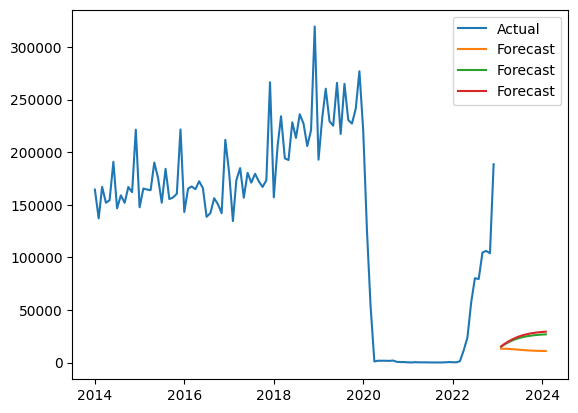

In [20]:

# Plot the results
plt.plot(data.index, data['total_visitor'], label='Actual')
plt.plot(future_dates, y_future_pred_inv, label='Forecast')
plt.plot(future_dates_30, y_future_pred_inv_30, label='Forecast')
plt.plot(future_dates_40, y_future_pred_inv_40, label='Forecast')
plt.legend()
plt.show()